In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
twitter_api = pd.read_csv("/Users/sangrok/Desktop/EAS 560/twitter_api.csv", sep = "\t")

In [3]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tweepy

consumer_key = twitter_api["api"][0]
consumer_secret = twitter_api["api"][1]
access_token_key = twitter_api["api"][2]
access_token_secret = twitter_api["api"][3]

authentication = tweepy.OAuthHandler(consumer_key, consumer_secret)

authentication.set_access_token(access_token_key, access_token_secret)

api = tweepy.API(authentication, wait_on_rate_limit = True)

In [5]:
# import the 200 tweets from twitter user
tweets = api.user_timeline(screen_name = "JeffBezos", count = 200, tweet_mode = "extended")

# print the most recent 10 tweets
for tweet in tweets[:10]:
    print(tweet.full_text + "\n")

Discussing climate, sustainability, and preserving the natural world with President @EmmanuelMacron today in Paris. #BezosEarthFund #ClimatePledge https://t.co/1WJe18nc3l

I just took a DNA test, turns out I’m 100% @lizzo’s biggest fan. #SBLIV https://t.co/RhOduXk8Qd

Hey, Alexa — show everyone our upcoming Super Bowl ad. Thanks @TheEllenShow and @PortiaDeRossi! https://t.co/U8Qua3dhwg

#Jamal https://t.co/8ej1rUBXVb

Hey, India. We’re rolling out our new fleet of electric delivery rickshaws. Fully electric. Zero carbon. #ClimatePledge https://t.co/qFXdZOsY4y

Proud of the program we have in India to hire and train deaf associates at our delivery stations. Managers learn basic sign language to be able to communicate. Meeting this group was a moving experience for me. https://t.co/gGm0dvCjkX

Amazon partners with thousands of kirana stores all over India as delivery points. It’s good for customers, and it helps the shop owners earn additional income. Got to visit one in Mumbai. Thank yo

In [6]:
# create a dataframe
df = pd.DataFrame([tweet.full_text for tweet in tweets], columns = ["tweets"])

for word in range(len(df["tweets"])):
    df["tweets"][word] = df["tweets"][word].lower()

df.head()

,tweets
0,"discussing climate, sustainability, and preser..."
1,"i just took a dna test, turns out i’m 100% @li..."
2,"hey, alexa — show everyone our upcoming super ..."
3,#jamal https://t.co/8ej1rubxvb
4,"hey, india. we’re rolling out our new fleet of..."


In [7]:
# remove unwanted url, numbers and special characters
def remove_text_pattern(tweet):
    tweet = re.sub("((http|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?", " ", tweet)
    tweet = re.sub("@[\w]*", " ", tweet)
    tweet = re.sub("[^a-zA-Z#]", " ", tweet)
    tweet = re.sub("#", " ", tweet)
    
    return tweet

df["tweets_adj"] = df["tweets"].apply(remove_text_pattern)
df.head()

,tweets,tweets_adj
0,"discussing climate, sustainability, and preser...",discussing climate sustainability and preser...
1,"i just took a dna test, turns out i’m 100% @li...",i just took a dna test turns out i m s...
2,"hey, alexa — show everyone our upcoming super ...",hey alexa show everyone our upcoming super ...
3,#jamal https://t.co/8ej1rubxvb,jamal
4,"hey, india. we’re rolling out our new fleet of...",hey india we re rolling out our new fleet of...


In [8]:
# remove the short words
df["tweets_adj"] = df["tweets_adj"].apply(lambda x: " ".join([word for word in x.split() if len(word) > 3]))
df.head()

,tweets,tweets_adj
0,"discussing climate, sustainability, and preser...",discussing climate sustainability preserving n...
1,"i just took a dna test, turns out i’m 100% @li...",just took test turns biggest sbliv
2,"hey, alexa — show everyone our upcoming super ...",alexa show everyone upcoming super bowl thanks
3,#jamal https://t.co/8ej1rubxvb,jamal
4,"hey, india. we’re rolling out our new fleet of...",india rolling fleet electric delivery rickshaw...


In [9]:
# tokenization
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

tweet_tokens = df["tweets_adj"].apply(lambda x: tweet_tokenizer.tokenize(x))
tweet_tokens.head()

0    [discussing, climate, sustainability, preservi...
1            [just, took, test, turns, biggest, sbliv]
2    [alexa, show, everyone, upcoming, super, bowl,...
3                                              [jamal]
4    [india, rolling, fleet, electric, delivery, ri...
Name: tweets_adj, dtype: object

In [10]:
# stemming
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language = "english")

tweet_tokens = tweet_tokens.apply(lambda x: [s_stemmer.stem(token) for token in x])
tweet_tokens.head()

0    [discuss, climat, sustain, preserv, natur, wor...
1             [just, took, test, turn, biggest, sbliv]
2    [alexa, show, everyon, upcom, super, bowl, thank]
3                                              [jamal]
4    [india, roll, fleet, electr, deliveri, ricksha...
Name: tweets_adj, dtype: object

In [11]:
# lemmatization
nltk.download("wordnet", quiet = True)
from nltk.stem import WordNetLemmatizer
lemmatization = WordNetLemmatizer()

tweet_tokens = tweet_tokens.apply(lambda x: [lemmatization.lemmatize(token, pos = "v") for token in x])
tweet_tokens.head()

0    [discuss, climat, sustain, preserv, natur, wor...
1             [just, take, test, turn, biggest, sbliv]
2    [alexa, show, everyon, upcom, super, bowl, thank]
3                                              [jamal]
4    [india, roll, fleet, electr, deliveri, ricksha...
Name: tweets_adj, dtype: object

In [12]:
# stop words
nltk.download("stopwords", quiet = True)
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

tweet_tokens = tweet_tokens.apply(lambda x: [token for token in x if not token in stop_words])
tweet_tokens.head()

0    [discuss, climat, sustain, preserv, natur, wor...
1                   [take, test, turn, biggest, sbliv]
2    [alexa, show, everyon, upcom, super, bowl, thank]
3                                              [jamal]
4    [india, roll, fleet, electr, deliveri, ricksha...
Name: tweets_adj, dtype: object

In [13]:
# remove the punctuations
punctuations = ".,?;!:"

for tweet in tweet_tokens:
    for word in tweet:
        if word in punctuations:
            tweet.remove(word)

tweet_tokens.head()

0    [discuss, climat, sustain, preserv, natur, wor...
1                   [take, test, turn, biggest, sbliv]
2    [alexa, show, everyon, upcom, super, bowl, thank]
3                                              [jamal]
4    [india, roll, fleet, electr, deliveri, ricksha...
Name: tweets_adj, dtype: object

In [14]:
# concatenate
for token in range(len(tweet_tokens)):
    tweet_tokens[token] = " ".join(tweet_tokens[token])

df["tweets_adj"] = tweet_tokens

In [15]:
df.head()

,tweets,tweets_adj
0,"discussing climate, sustainability, and preser...",discuss climat sustain preserv natur world pre...
1,"i just took a dna test, turns out i’m 100% @li...",take test turn biggest sbliv
2,"hey, alexa — show everyone our upcoming super ...",alexa show everyon upcom super bowl thank
3,#jamal https://t.co/8ej1rubxvb,jamal
4,"hey, india. we’re rolling out our new fleet of...",india roll fleet electr deliveri rickshaw full...


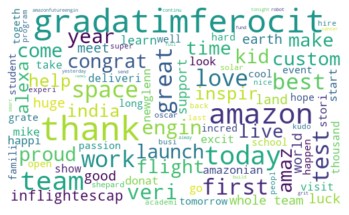

In [16]:
# visualize the most common words
from wordcloud import WordCloud

words = " ".join([word for word in df["tweets_adj"]])
wordcloud = WordCloud(width = 500, height = 300, max_font_size = 50, max_words = 100, background_color = "white").generate(words)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [17]:
nltk.download("vader_lexicon", quiet = True)

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df["scores"] = df["tweets_adj"].apply(lambda x: sia.polarity_scores(x))
df.head()

,tweets,tweets_adj,scores
0,"discussing climate, sustainability, and preser...",discuss climat sustain preserv natur world pre...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,"i just took a dna test, turns out i’m 100% @li...",take test turn biggest sbliv,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,"hey, alexa — show everyone our upcoming super ...",alexa show everyon upcom super bowl thank,"{'neg': 0.0, 'neu': 0.439, 'pos': 0.561, 'comp..."
3,#jamal https://t.co/8ej1rubxvb,jamal,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,"hey, india. we’re rolling out our new fleet of...",india roll fleet electr deliveri rickshaw full...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [18]:
df["compound"] = df["scores"].apply(lambda x: x["compound"])
df.head()

,tweets,tweets_adj,scores,compound
0,"discussing climate, sustainability, and preser...",discuss climat sustain preserv natur world pre...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,"i just took a dna test, turns out i’m 100% @li...",take test turn biggest sbliv,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,"hey, alexa — show everyone our upcoming super ...",alexa show everyon upcom super bowl thank,"{'neg': 0.0, 'neu': 0.439, 'pos': 0.561, 'comp...",0.7506
3,#jamal https://t.co/8ej1rubxvb,jamal,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,"hey, india. we’re rolling out our new fleet of...",india roll fleet electr deliveri rickshaw full...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [19]:
df["compound_scores"] = df["compound"].apply(lambda x: "pos" if x > 0 else ("neu" if x == 0 else "neg"))
df.head()

,tweets,tweets_adj,scores,compound,compound_scores
0,"discussing climate, sustainability, and preser...",discuss climat sustain preserv natur world pre...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
1,"i just took a dna test, turns out i’m 100% @li...",take test turn biggest sbliv,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
2,"hey, alexa — show everyone our upcoming super ...",alexa show everyon upcom super bowl thank,"{'neg': 0.0, 'neu': 0.439, 'pos': 0.561, 'comp...",0.7506,pos
3,#jamal https://t.co/8ej1rubxvb,jamal,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
4,"hey, india. we’re rolling out our new fleet of...",india roll fleet electr deliveri rickshaw full...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu


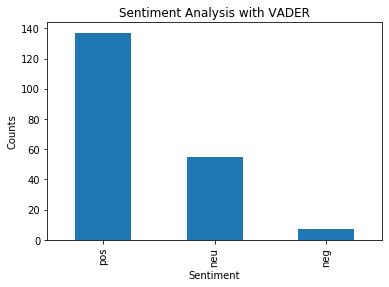

In [20]:
df["compound_scores"].value_counts().plot(kind = "bar")
plt.title("Sentiment Analysis with VADER")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
plt.show()

In [21]:
df["compound_scores"].value_counts()

pos    137
neu     55
neg      7
Name: compound_scores, dtype: int64

In [22]:
for i in range(0, df.shape[0]):
    if(df["compound_scores"][i] == "neg"):
        print(df["tweets"][i])
        print()

rt @jaycarney: if you can’t compete with lower prices and better services, then secretly fund phony “grassroots” attack campaigns. #ugly. h…

so much fun with caroline kennedy yesterday at the #jfkspacesummit. her father’s rice speech still inspires. we choose to do these things “not because they are easy, but because they are hard.” #apollo50 https://t.co/zmybdxzk4v

grateful for the journalists at the @washingtonpost and around the world who do the work, no matter the risk or dangers they face.
#democracydiesindarkness #superbowlad https://t.co/fao74lvss5 https://t.co/37plrnlje0

long my favorite novel. teaches pain of regret so well you will think you lived it. congrats, mr. ishiguro, so earned! #nobelprize https://t.co/vboylyliii

here’s one more shot of be-4 in its transport cradle. https://t.co/t2hdz3utqz

steering through violent maxq escape forces is a residual capability, not explicitly engineered. just a very robust booster. #inflightescape

that is one hell of a booster. #in

In [23]:
# create a function for subjectivity and polarity
from textblob import TextBlob

def subjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

df["subjectivity"] = df["tweets_adj"].apply(subjectivity)
df["polarity"] = df["tweets_adj"].apply(polarity)

df.head()

,tweets,tweets_adj,scores,compound,compound_scores,subjectivity,polarity
0,"discussing climate, sustainability, and preser...",discuss climat sustain preserv natur world pre...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.000000,0.000000
1,"i just took a dna test, turns out i’m 100% @li...",take test turn biggest sbliv,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.000000,0.000000
2,"hey, alexa — show everyone our upcoming super ...",alexa show everyon upcom super bowl thank,"{'neg': 0.0, 'neu': 0.439, 'pos': 0.561, 'comp...",0.7506,pos,0.666667,0.333333
3,#jamal https://t.co/8ej1rubxvb,jamal,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.000000,0.000000
4,"hey, india. we’re rolling out our new fleet of...",india roll fleet electr deliveri rickshaw full...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.000000,0.000000


In [24]:
# create a function for analysis
def analysis(score):
    if score > 0:
        return "pos"
    elif score == 0:
        return "neu"
    else:
        return "neg"

df["analysis"] = df["polarity"].apply(analysis)
df.head()

,tweets,tweets_adj,scores,compound,compound_scores,subjectivity,polarity,analysis
0,"discussing climate, sustainability, and preser...",discuss climat sustain preserv natur world pre...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.000000,0.000000,neu
1,"i just took a dna test, turns out i’m 100% @li...",take test turn biggest sbliv,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.000000,0.000000,neu
2,"hey, alexa — show everyone our upcoming super ...",alexa show everyon upcom super bowl thank,"{'neg': 0.0, 'neu': 0.439, 'pos': 0.561, 'comp...",0.7506,pos,0.666667,0.333333,pos
3,#jamal https://t.co/8ej1rubxvb,jamal,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.000000,0.000000,neu
4,"hey, india. we’re rolling out our new fleet of...",india roll fleet electr deliveri rickshaw full...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.000000,0.000000,neu


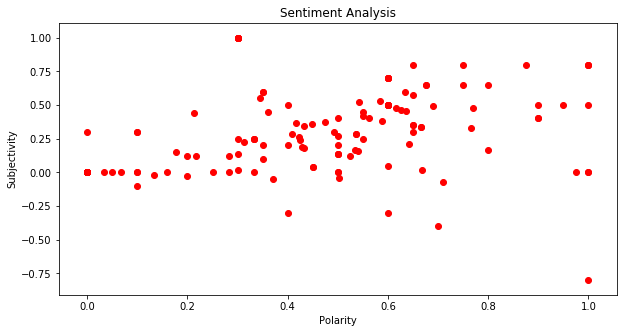

In [25]:
plt.figure(figsize = (10, 5))

for i in range(0, df.shape[0]):
    plt.scatter(df["subjectivity"][i], df["polarity"][i], color = "red")

plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

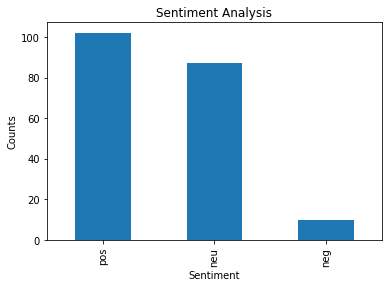

In [26]:
df["analysis"].value_counts().plot(kind = "bar")
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
plt.show()

In [27]:
df["analysis"].value_counts()

pos    102
neu     87
neg     10
Name: analysis, dtype: int64

In [28]:
for i in range(0, df.shape[0]):
    if(df["analysis"][i] == "neg"):
        print(df["tweets"][i])
        print()

so much fun with caroline kennedy yesterday at the #jfkspacesummit. her father’s rice speech still inspires. we choose to do these things “not because they are easy, but because they are hard.” #apollo50 https://t.co/zmybdxzk4v

amazon just won the american foundation for the blind’s helen keller award! huge kudos to the whole team on working so hard to make our products accessible to the vision impaired! @afb1921 https://t.co/qh6hkqkekb

congrats to jeff on his long-term leadership. john, you have size 20 shoes to fill! ge remains an american gem. https://t.co/off4yp9j4e

impossible to express how personally meaningful this is. a dream. huge kudos to @blueorigin team that worked so hard https://t.co/q2p0lsi81u https://t.co/d56xnkiibp

1st be-4 engine fully assembled. 2nd and 3rd following close behind. #gradatimferociter https://t.co/due4tnzvkx

late late show’s @jkcorden on amazon go – very funny! https://t.co/oow3ev2l1x

long wait is over… clarkson, hammond, may are back… #thegrandt

In [29]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(classification_report(df["compound_scores"], df["analysis"]))

              precision    recall  f1-score   support

         neg       0.20      0.29      0.24         7
         neu       0.46      0.73      0.56        55
         pos       0.87      0.65      0.74       137

    accuracy                           0.66       199
   macro avg       0.51      0.55      0.51       199
weighted avg       0.73      0.66      0.68       199

